In [1]:
import torch
import torchvision
from torch import nn
from torchvision import transforms

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device : {device}')

Using device : cuda


In [63]:
num_epochs = 15
num_classes = 10
batch_size = 32
learning_rate = 0.005

In [64]:
train_dataset = torchvision.datasets.MNIST(root = '../../data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True,
                                           )
test_dataset = torchvision.datasets.MNIST(root = '../../data',
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          )

In [65]:
train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                               batch_size = batch_size,
                                               shuffle = True,
                                               )
test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                              batch_size = batch_size,
                                              shuffle = False,
                                              )

In [66]:
from torch.nn.modules.batchnorm import BatchNorm2d
# Build Convolutional Neural Network

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Linear(7*7*32, num_classes)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.reshape(x.size(0), -1) # flatten
        out = self.fc(x)
        return out

In [67]:
model = CNN(num_classes=num_classes).to(device)

In [68]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [69]:
from tqdm import tqdm

In [70]:
# Train the Model

train_step = 1
total_step = len(train_dataloader)
log_interval = 500
losses = []
steps = []

for epoch in range(1, num_epochs+1):
    for batch_idx, (images, labels) in enumerate(
        tqdm(train_dataloader, position=0, leave=True, desc='train')
    ):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if train_step%log_interval == 0:
            print(f'Epoch : {epoch}/{num_epochs}, Steps : {train_step}/{total_step*num_epochs},  Loss : {loss.item():.4f}')
            losses.append(loss.item())
            steps.append(train_step)
        train_step += 1

train:  28%|██▊       | 529/1875 [00:02<00:06, 215.37it/s]

Epoch : 1/15, Steps : 500/28125,  Loss : 0.0279


train:  55%|█████▌    | 1035/1875 [00:04<00:03, 214.41it/s]

Epoch : 1/15, Steps : 1000/28125,  Loss : 0.1725


train:  82%|████████▏ | 1530/1875 [00:07<00:01, 216.44it/s]

Epoch : 1/15, Steps : 1500/28125,  Loss : 0.0174


train:   8%|▊         | 155/1875 [00:00<00:07, 216.51it/s]

Epoch : 2/15, Steps : 2000/28125,  Loss : 0.0667


train:  34%|███▍      | 640/1875 [00:04<00:07, 158.72it/s]

Epoch : 2/15, Steps : 2500/28125,  Loss : 0.0053


train:  61%|██████▏   | 1151/1875 [00:07<00:03, 208.12it/s]

Epoch : 2/15, Steps : 3000/28125,  Loss : 0.0104


train:  88%|████████▊ | 1650/1875 [00:10<00:01, 175.14it/s]

Epoch : 2/15, Steps : 3500/28125,  Loss : 0.0853


train:  15%|█▌        | 286/1875 [00:01<00:07, 213.69it/s]

Epoch : 3/15, Steps : 4000/28125,  Loss : 0.0014


train:  42%|████▏     | 782/1875 [00:03<00:05, 195.78it/s]

Epoch : 3/15, Steps : 4500/28125,  Loss : 0.3608


train:  69%|██████▊   | 1287/1875 [00:06<00:02, 214.40it/s]

Epoch : 3/15, Steps : 5000/28125,  Loss : 0.0146


train:  94%|█████████▍| 1770/1875 [00:08<00:00, 211.60it/s]

Epoch : 3/15, Steps : 5500/28125,  Loss : 0.0945


train:  22%|██▏       | 404/1875 [00:02<00:07, 186.27it/s]

Epoch : 4/15, Steps : 6000/28125,  Loss : 0.0187


train:  47%|████▋     | 878/1875 [00:04<00:07, 131.58it/s]

Epoch : 4/15, Steps : 6500/28125,  Loss : 0.0033


train:  75%|███████▌  | 1407/1875 [00:07<00:02, 208.80it/s]

Epoch : 4/15, Steps : 7000/28125,  Loss : 0.0306


train: 100%|██████████| 1875/1875 [00:10<00:00, 182.25it/s]


Epoch : 4/15, Steps : 7500/28125,  Loss : 0.0058


train:  28%|██▊       | 516/1875 [00:04<00:08, 153.66it/s]

Epoch : 5/15, Steps : 8000/28125,  Loss : 0.0005


train:  54%|█████▍    | 1019/1875 [00:07<00:06, 133.24it/s]

Epoch : 5/15, Steps : 8500/28125,  Loss : 0.0266


train:  82%|████████▏ | 1538/1875 [00:10<00:01, 192.09it/s]

Epoch : 5/15, Steps : 9000/28125,  Loss : 0.0538


train:   8%|▊         | 151/1875 [00:00<00:09, 190.97it/s]

Epoch : 6/15, Steps : 9500/28125,  Loss : 0.0096


train:  35%|███▍      | 649/1875 [00:03<00:06, 191.58it/s]

Epoch : 6/15, Steps : 10000/28125,  Loss : 0.0062


train:  61%|██████    | 1146/1875 [00:06<00:03, 212.66it/s]

Epoch : 6/15, Steps : 10500/28125,  Loss : 0.0017


train:  88%|████████▊ | 1649/1875 [00:08<00:01, 192.80it/s]

Epoch : 6/15, Steps : 11000/28125,  Loss : 0.1426


train:  15%|█▍        | 279/1875 [00:01<00:10, 157.28it/s]

Epoch : 7/15, Steps : 11500/28125,  Loss : 0.0005


train:  41%|████      | 773/1875 [00:04<00:05, 212.54it/s]

Epoch : 7/15, Steps : 12000/28125,  Loss : 0.0406


train:  68%|██████▊   | 1283/1875 [00:06<00:02, 211.09it/s]

Epoch : 7/15, Steps : 12500/28125,  Loss : 0.0116


train:  95%|█████████▍| 1778/1875 [00:09<00:00, 183.90it/s]

Epoch : 7/15, Steps : 13000/28125,  Loss : 0.0254


train:  22%|██▏       | 412/1875 [00:02<00:07, 206.15it/s]

Epoch : 8/15, Steps : 13500/28125,  Loss : 0.0000


train:  48%|████▊     | 905/1875 [00:05<00:05, 191.44it/s]

Epoch : 8/15, Steps : 14000/28125,  Loss : 0.0001


train:  75%|███████▍  | 1403/1875 [00:08<00:02, 190.58it/s]

Epoch : 8/15, Steps : 14500/28125,  Loss : 0.0000


train: 100%|██████████| 1875/1875 [00:10<00:00, 180.59it/s]


Epoch : 8/15, Steps : 15000/28125,  Loss : 0.0347


train:  28%|██▊       | 523/1875 [00:03<00:10, 128.42it/s]

Epoch : 9/15, Steps : 15500/28125,  Loss : 0.0052


train:  55%|█████▌    | 1034/1875 [00:07<00:05, 164.65it/s]

Epoch : 9/15, Steps : 16000/28125,  Loss : 0.0526


train:  81%|████████▏ | 1525/1875 [00:10<00:01, 206.94it/s]

Epoch : 9/15, Steps : 16500/28125,  Loss : 0.0003


train:   6%|▋         | 120/1875 [00:00<00:08, 204.04it/s]

Epoch : 10/15, Steps : 17000/28125,  Loss : 0.0000


train:  35%|███▍      | 648/1875 [00:03<00:05, 207.27it/s]

Epoch : 10/15, Steps : 17500/28125,  Loss : 0.0000


train:  62%|██████▏   | 1158/1875 [00:07<00:04, 174.20it/s]

Epoch : 10/15, Steps : 18000/28125,  Loss : 0.0027


train:  87%|████████▋ | 1635/1875 [00:09<00:01, 166.88it/s]

Epoch : 10/15, Steps : 18500/28125,  Loss : 0.0003


train:  15%|█▍        | 275/1875 [00:01<00:07, 208.51it/s]

Epoch : 11/15, Steps : 19000/28125,  Loss : 0.0000


train:  42%|████▏     | 782/1875 [00:04<00:05, 205.54it/s]

Epoch : 11/15, Steps : 19500/28125,  Loss : 0.0000


train:  68%|██████▊   | 1270/1875 [00:07<00:04, 150.43it/s]

Epoch : 11/15, Steps : 20000/28125,  Loss : 0.0293


train:  95%|█████████▍| 1773/1875 [00:10<00:00, 168.55it/s]

Epoch : 11/15, Steps : 20500/28125,  Loss : 0.0068


train:  21%|██        | 391/1875 [00:02<00:07, 192.93it/s]

Epoch : 12/15, Steps : 21000/28125,  Loss : 0.0064


train:  48%|████▊     | 893/1875 [00:05<00:06, 143.85it/s]

Epoch : 12/15, Steps : 21500/28125,  Loss : 0.0016


train:  74%|███████▍  | 1391/1875 [00:08<00:03, 127.50it/s]

Epoch : 12/15, Steps : 22000/28125,  Loss : 0.0000


train: 100%|██████████| 1875/1875 [00:10<00:00, 171.72it/s]


Epoch : 12/15, Steps : 22500/28125,  Loss : 0.0000


train:  28%|██▊       | 523/1875 [00:02<00:06, 211.99it/s]

Epoch : 13/15, Steps : 23000/28125,  Loss : 0.0001


train:  55%|█████▍    | 1028/1875 [00:05<00:03, 213.86it/s]

Epoch : 13/15, Steps : 23500/28125,  Loss : 0.0000


train:  82%|████████▏ | 1536/1875 [00:07<00:01, 212.04it/s]

Epoch : 13/15, Steps : 24000/28125,  Loss : 0.0001


train:   8%|▊         | 154/1875 [00:00<00:08, 214.89it/s]

Epoch : 14/15, Steps : 24500/28125,  Loss : 0.0000


train:  34%|███▍      | 635/1875 [00:03<00:07, 158.52it/s]

Epoch : 14/15, Steps : 25000/28125,  Loss : 0.0008


train:  62%|██████▏   | 1157/1875 [00:06<00:03, 210.37it/s]

Epoch : 14/15, Steps : 25500/28125,  Loss : 0.0000


train:  88%|████████▊ | 1659/1875 [00:08<00:01, 206.44it/s]

Epoch : 14/15, Steps : 26000/28125,  Loss : 0.0000


train:  15%|█▌        | 288/1875 [00:01<00:08, 193.81it/s]

Epoch : 15/15, Steps : 26500/28125,  Loss : 0.0028


train:  40%|████      | 759/1875 [00:04<00:07, 152.89it/s]

Epoch : 15/15, Steps : 27000/28125,  Loss : 0.0000


train:  68%|██████▊   | 1280/1875 [00:07<00:02, 215.85it/s]

Epoch : 15/15, Steps : 27500/28125,  Loss : 0.0000


train:  95%|█████████▍| 1772/1875 [00:09<00:00, 181.15it/s]

Epoch : 15/15, Steps : 28000/28125,  Loss : 0.0000


train: 100%|██████████| 1875/1875 [00:10<00:00, 183.36it/s]


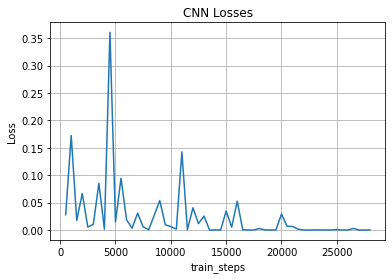

In [73]:
import matplotlib.pyplot as plt

plt.title('CNN Losses')
plt.plot(steps, losses)
plt.xlabel('train_steps'); plt.ylabel('Loss')
plt.grid()

In [77]:
# Test the Model
model.eval()
with torch.no_grad():
    total = 0
    correct = 0
    for batch_idx, (images, labels) in enumerate(
        tqdm(test_dataloader, position=0, leave=True, desc='test')
        ):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            a, preds = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (preds == labels).sum().item()
    print()
    print(f'Test Accuracy of CNN on the test MNIST images : {correct / total * 100:.4f}%')

torch.save(model.state_dict(), 'model.ckpt')

test: 100%|██████████| 313/313 [00:00<00:00, 331.67it/s]


Test Accuracy of CNN on the test MNIST images : 98.9600%
